In [1]:
from pyforest import *

In [2]:
sns.set()

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## Univariate Analysis

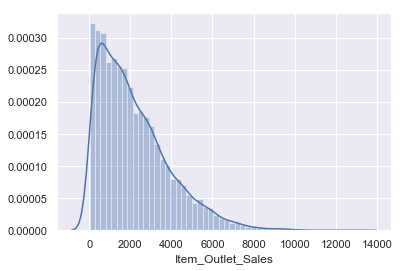

In [6]:
# Item Outlet Sales
sns.distplot(train.Item_Outlet_Sales)
plt.show()

Sales are skewed because of outliers

In [7]:
#Statistics
train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

Because of max values it is skewed

## Base Model - Average

In [8]:
#solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                        #"Outlet_Identifier":test.Outlet_Identifier,
                       # "Item_Outlet_Sales":train.Item_Outlet_Sales.mean()})
#solution.to_csv('Base model.csv',index = False) 

In [9]:
#solution.head()

In [10]:
#solution.to_csv('Base model.csv',index = False)  #1773.82

## Combining The Data sets

In [11]:
combined = pd.concat([train,test],sort = False,ignore_index = True)

In [12]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [13]:
combined.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Univariate Analysis - Numerical Columns:
1. Target Variable, Item Visibility appears

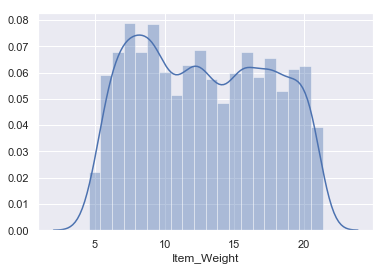

In [14]:
sns.distplot(train.Item_Weight.dropna())

# Inf: Item weight not showing any shape

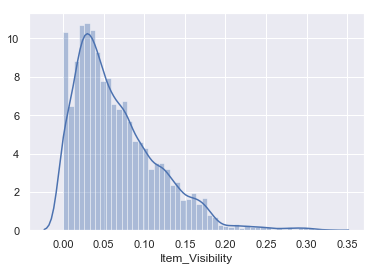

In [15]:
#Item Visibility
sns.distplot(combined.Item_Visibility)
# Visibility is skewed meaning some items having higher Visibility

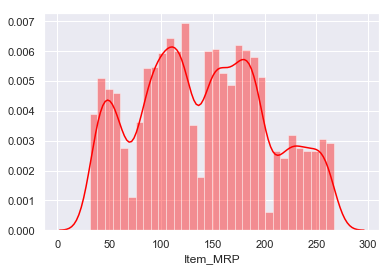

In [16]:

sns.distplot(combined.Item_MRP,color = 'red')

#4 different distributions need more research 

## Univariate Analysis _ categorical Analysis

In [17]:
combined.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [18]:
combined.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [19]:
#Replace LF,low fat into Low fat
combined.Item_Fat_Content.replace(to_replace= ['LF','low fat'],value = ['Low Fat']*2,inplace = True)

In [20]:
combined.Item_Fat_Content.replace(to_replace= ['reg'],value = ['Regular'],inplace = True)

In [21]:
combined.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

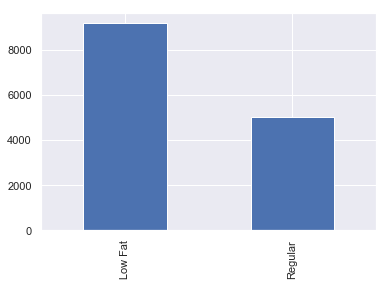

In [22]:
combined.Item_Fat_Content.value_counts().plot(kind = 'bar')

In [23]:
# Low fat items are selled more than regular

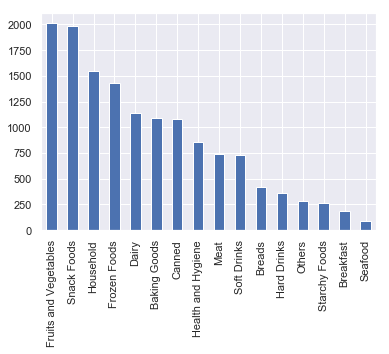

In [24]:
combined.Item_Type.value_counts().plot(kind = 'bar')
# Top 5 items are fruits and veggies, snacks, household, frozen foods,dairy

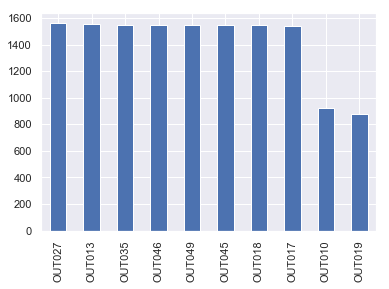

In [25]:
# Outlet ID
combined.Outlet_Identifier.value_counts().plot(kind= 'bar')
# Top 2 outler = OUT027& OUT 013

In [26]:
#Outlet Size
combined.Outlet_Size.value_counts()

# Medium outlets are performing better than the rest

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [27]:
combined.groupby('Outlet_Size')['Outlet_Identifier'].value_counts()

#Inf : Outlet13 is high size outlet
#      Outlet27 is medium size outlet


Outlet_Size  Outlet_Identifier
High         OUT013               1553
Medium       OUT027               1559
             OUT049               1550
             OUT018               1546
Small        OUT035               1550
             OUT046               1550
             OUT019                880
Name: Outlet_Identifier, dtype: int64

In [28]:
combined.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [29]:
combined.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

## Bivariate Analysis - Numerical vs Numerical¶
Scatterplot

In [30]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


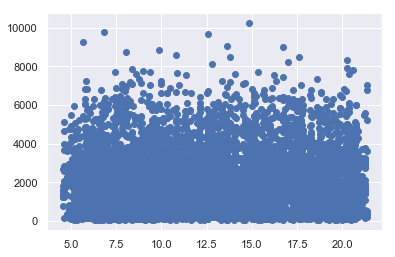

In [31]:
#item weight vs sales
plt.scatter(combined.Item_Weight,combined.Item_Outlet_Sales)

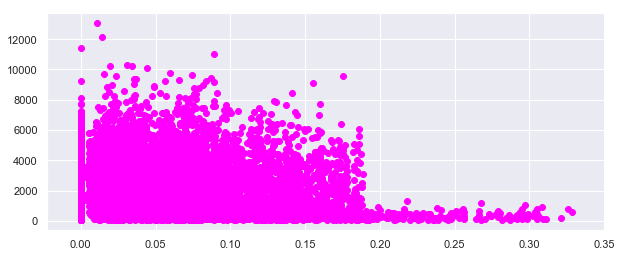

In [32]:
plt.figure(figsize=[10,4])
plt.scatter(combined.Item_Visibility,combined.Item_Outlet_Sales,color = 'magenta')

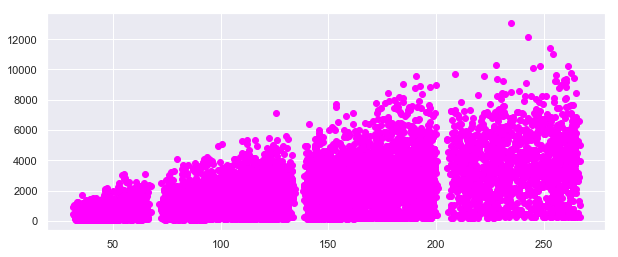

In [33]:
# MRP , Sales
plt.figure(figsize=[10,4])
plt.scatter(combined.Item_MRP
            ,combined.Item_Outlet_Sales,color = 'magenta')

#Inf - MRP is consolidate 

## Bivariate Analysis - Categorical vs Numerica

In [34]:
combined.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

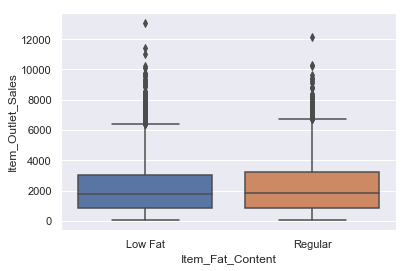

In [35]:
sns.boxplot('Item_Fat_Content','Item_Outlet_Sales',data=combined)

In [36]:
combined.groupby('Item_Fat_Content')['Item_Outlet_Sales'].describe().T

Item_Fat_Content,Low Fat,Regular
count,5517.000000,3006.000000
mean,2157.711534,2224.561170
std,1697.973824,1721.480865
min,33.290000,33.955800
25%,826.257800,857.550400
50%,1765.035800,1844.598900
75%,3050.695600,3198.669650
max,13086.964800,12117.560000


In [37]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [38]:
combined.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

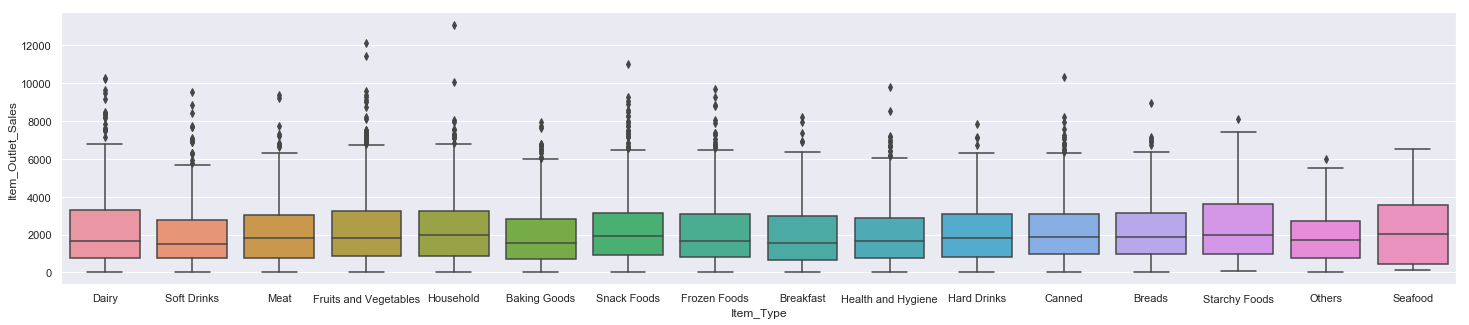

In [39]:
plt.figure(figsize = (25,5))
sns.boxplot('Item_Type','Item_Outlet_Sales',data=combined)
plt.show()

Missing values Treatment

In [40]:
combined.isnull().sum()[combined.isnull().sum()!=0]
# Item Visibility is 0

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [41]:
combined[combined.Item_Weight.isnull()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [42]:
combined[combined.Item_Identifier=='FDU13']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
632,FDU13,8.355,Low Fat,0.188323,Canned,148.5418,OUT018,2009,Medium,Tier 3,Supermarket Type2,2207.1270
854,FDU13,NaN,Low Fat,0.328391,Canned,146.0418,OUT019,1985,Small,Tier 1,Grocery Store,588.5672
2677,FDU13,8.355,Low Fat,0.000000,Canned,145.6418,OUT013,1987,High,Tier 3,Supermarket Type1,3384.2614
3003,FDU13,8.355,Low Fat,0.187850,Canned,146.5418,OUT049,1999,Medium,Tier 1,Supermarket Type1,2501.4106
3181,FDU13,8.355,Low Fat,0.187523,Canned,146.2418,OUT035,2004,Small,Tier 2,Supermarket Type1,4414.2540
4590,FDU13,8.355,Low Fat,0.187939,Canned,146.9418,OUT045,2002,NaN,Tier 2,Supermarket Type1,1029.9926
6175,FDU13,8.355,Low Fat,0.188620,Canned,146.4418,OUT017,2007,NaN,Tier 2,Supermarket Type1,3089.9778
7973,FDU13,8.355,Low Fat,0.187559,Canned,148.0418,OUT046,1997,Small,Tier 1,Supermarket Type1,1471.4180
11380,FDU13,NaN,Low Fat,0.186650,Canned,149.1418,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
12731,FDU13,8.355,Low Fat,0.313935,Canned,146.5418,OUT010,1998,NaN,Tier 3,Grocery Store,NaN


In [43]:
combined.loc[combined.Item_Identifier=='FDP10','Item_Weight']

7         NaN
585      19.0
2623     19.0
3382     19.0
4585     19.0
6087     19.0
7883     19.0
11896    19.0
12371    19.0
13327     NaN
Name: Item_Weight, dtype: float64

In [44]:
combined['Item_Weight']=combined.groupby("Item_Identifier")['Item_Weight'].transform(lambda x:x.fillna(x.mean()))

In [45]:
combined.loc[combined.Item_Identifier=='FDP10','Item_Weight']

7        19.0
585      19.0
2623     19.0
3382     19.0
4585     19.0
6087     19.0
7883     19.0
11896    19.0
12371    19.0
13327    19.0
Name: Item_Weight, dtype: float64

In [46]:
combined.shape

(14204, 12)

In [47]:
# Outlet size
combined[combined.Outlet_Size.isnull()].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986


In [48]:
combined[combined.Outlet_Size.isnull()]['Outlet_Location_Type'].unique()

array(['Tier 3', 'Tier 2'], dtype=object)

In [49]:
combined[combined.Outlet_Size.isnull()]['Outlet_Type'].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [50]:
pd.DataFrame(combined.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Size'].value_counts())

Outlet_Size
Outlet_Type       Outlet_Location_Type Outlet_Size             
Grocery Store     Tier 1               Small                880
Supermarket Type1 Tier 1               Medium              1550
                                       Small               1550
                  Tier 2               Small               1550
                  Tier 3               High                1553
Supermarket Type2 Tier 3               Medium              1546
Supermarket Type3 Tier 3               Medium              1559

In [51]:
# FOr gorcery store
combined[combined.Outlet_Type=='Grocery Store']['Outlet_Type']

3        Grocery Store
23       Grocery Store
28       Grocery Store
29       Grocery Store
30       Grocery Store
45       Grocery Store
49       Grocery Store
59       Grocery Store
63       Grocery Store
65       Grocery Store
77       Grocery Store
83       Grocery Store
90       Grocery Store
95       Grocery Store
108      Grocery Store
112      Grocery Store
122      Grocery Store
133      Grocery Store
139      Grocery Store
174      Grocery Store
175      Grocery Store
177      Grocery Store
178      Grocery Store
182      Grocery Store
186      Grocery Store
205      Grocery Store
208      Grocery Store
209      Grocery Store
214      Grocery Store
215      Grocery Store
             ...      
13911    Grocery Store
13921    Grocery Store
13946    Grocery Store
13950    Grocery Store
13958    Grocery Store
13965    Grocery Store
13967    Grocery Store
13973    Grocery Store
13978    Grocery Store
13981    Grocery Store
13988    Grocery Store
13992    Grocery Store
13998    Gr

In [52]:
combined[(combined.Outlet_Type=="Grocery Store")&(combined.Outlet_Location_Type=='Tier 1')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
23,FDC37,15.500,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,14.500,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
49,FDS02,10.195,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,5.940,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720
63,FDY40,15.500,Regular,0.150286,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076
77,FDN48,13.350,Low Fat,0.113720,Baking Goods,89.9804,OUT019,1985,Small,Tier 1,Grocery Store,643.1628
83,NCL18,18.850,Low Fat,0.293418,Household,194.6136,OUT019,1985,Small,Tier 1,Grocery Store,583.2408
95,FDU04,7.930,Low Fat,0.009715,Frozen Foods,120.0414,OUT019,1985,Small,Tier 1,Grocery Store,487.3656
108,DRE60,9.395,Low Fat,0.278974,Soft Drinks,225.3720,OUT019,1985,Small,Tier 1,Grocery Store,679.1160
112,FDW39,6.690,Regular,0.064625,Meat,176.9370,OUT019,1985,Small,Tier 1,Grocery Store,176.4370


In [53]:
combined[(combined.Outlet_Type=="Grocery Store")&(combined.Outlet_Location_Type=='Tier 3')]['Outlet_Size'] = 'Small'

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
combined.loc[combined.Outlet_Size.isnull(),'Outlet_Size']='Medium'

In [55]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [56]:
combined['Item_Visibility'] = combined.groupby('Item_Identifier')['Item_Visibility'].transform(lambda x:x.replace(0,x.median()))

In [57]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [58]:
a=combined[(combined.Item_Fat_Content == 'Low Fat')& 
         (combined.Item_Weight==11.8)&
         (combined.Item_Type == 'Fruits and Vegetables')]['Item_Visibility'].mean()

In [59]:
combined.loc[combined.Item_Visibility==0,'Item_Visibility'] = a

In [60]:
a

0.04570484

## Feature Engineering 
1. Outlet Vintage

2. Item Id - Identifier 1:2 letters

3. Price per unit - MRP/ Weight

4. Item type - Categorize as presihable and non - presihable

5. Where it is household in item type, Item fat content - Non Edible

6. Outlet ID to be converted in High performance, Medium performance and low performance take sales into consideration to create catgs

In [61]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [62]:
combined['Outlet_Vintage'] = 2013 - combined.Outlet_Establishment_Year

In [63]:
combined['Price_perunit'] = combined.Item_MRP/combined.Item_Weight

In [64]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [65]:
perishables = ['Dairy','Meat','Fruits and Vegetables','Breads','Seafood','Breakfast']

In [66]:
def itemcat(x):
    if (x in perishables):
        return('Perishables')
    else:
        return('Non_Perishables')

In [67]:
combined['ItemTypecat'] = combined.Item_Type.apply(itemcat)

In [68]:
str(combined.Item_Identifier[0])[:2]

'FD'

In [69]:
idlist= []
for i in combined.Item_Identifier:
    idlist.append(str(i)[:2])

In [70]:
combined['Itemid'] = pd.Series(idlist)

In [71]:
combined.Itemid.unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [72]:
combined.loc[combined.Itemid == 'NC', "Item_Fat_Content"] = 'Non Edible'

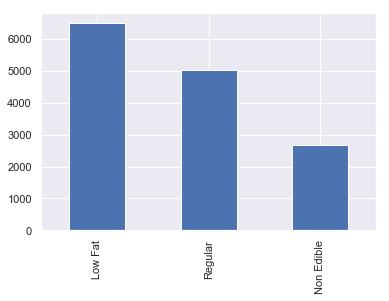

In [73]:
combined.Item_Fat_Content.value_counts().plot(kind = 'bar')

In [74]:
def outletcat(x):
    if(x>15):
        return ('Signature Outlets')
    elif(x>=10):
        return('Premium Outlets')
    elif(x>=5):
        return('Midum Age Outlets')
    else:
        return('Small Outlets')

In [75]:
combined['Vintage_cat'] = combined.Outlet_Vintage.apply(outletcat)

In [76]:
combined.Vintage_cat.unique()

array(['Premium Outlets', 'Small Outlets', 'Signature Outlets',
       'Midum Age Outlets'], dtype=object)

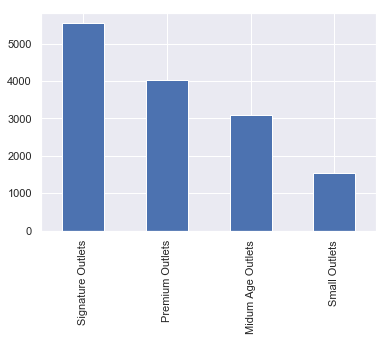

In [77]:
combined.Vintage_cat.value_counts().plot(kind = 'bar')

In [78]:
combined.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Vintage', 'Price_perunit',
       'ItemTypecat', 'Itemid', 'Vintage_cat'],
      dtype='object')

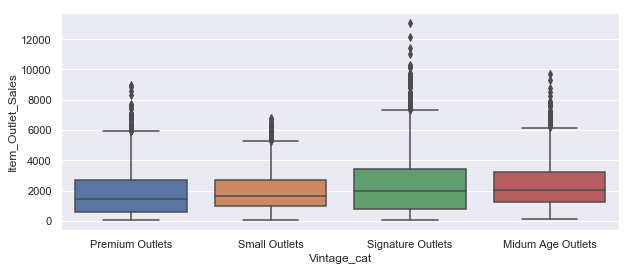

In [79]:
plt.figure(figsize=[10,4])
sns.boxplot(x = 'Vintage_cat',y = 'Item_Outlet_Sales',data = combined)

In [80]:
# Outlet vs Sales
combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean()

Outlet_Identifier
OUT010     339.351662
OUT013    2298.995256
OUT017    2340.675263
OUT018    1995.498739
OUT019     340.329723
OUT027    3694.038558
OUT035    2438.841866
OUT045    2192.384798
OUT046    2277.844267
OUT049    2348.354635
Name: Item_Outlet_Sales, dtype: float64

In [81]:

combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()

Outlet_Identifier
OUT010    1.883402e+05
OUT013    2.142664e+06
OUT017    2.167465e+06
OUT018    1.851823e+06
OUT019    1.796941e+05
OUT027    3.453926e+06
OUT035    2.268123e+06
OUT045    2.036725e+06
OUT046    2.118395e+06
OUT049    2.183970e+06
Name: Item_Outlet_Sales, dtype: float64

In [82]:
# Outlet Category

def outcat(x):
    if (x=='OUT027'):
        return('High Performance Outlet')
    elif((x == 'OUT010')| (x == 'OUT019')):
        return('Low Sales Outlet')
    else:
        return('Medium Sales Outlet')

In [83]:
combined['Outlet_cat']=combined.Outlet_Identifier.apply(outcat)

In [84]:
combined.shape

(14204, 18)

In [85]:
combined.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Vintage', 'Price_perunit',
       'ItemTypecat', 'Itemid', 'Vintage_cat', 'Outlet_cat'],
      dtype='object')

In [86]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage,Price_perunit,ItemTypecat,Itemid,Vintage_cat,Outlet_cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,26.861204,Perishables,FD,Premium Outlets,Medium Sales Outlet
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,8.153581,Non_Perishables,DR,Small Outlets,Medium Sales Outlet
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,8.092457,Perishables,FD,Premium Outlets,Medium Sales Outlet
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15,9.484115,Perishables,FD,Premium Outlets,Low Sales Outlet
4,NCD19,8.93,Non Edible,0.013177,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,6.031512,Non_Perishables,NC,Signature Outlets,Medium Sales Outlet


In [87]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 18 columns):
Item_Identifier              14204 non-null object
Item_Weight                  14204 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
Outlet_Vintage               14204 non-null int64
Price_perunit                14204 non-null float64
ItemTypecat                  14204 non-null object
Itemid                       14204 non-null object
Vintage_cat                  14204 non-null object
Outlet_cat            

In [88]:
combined.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Vintage', 'Price_perunit',
       'ItemTypecat', 'Itemid', 'Vintage_cat', 'Outlet_cat'],
      dtype='object')

In [89]:
newcombined = combined.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis = 1)

In [90]:
#Split the data in train and test
newtrain =newcombined.loc[:train.shape[0]-1]

In [91]:
newtest = newcombined.loc[train.shape[0]:]

In [92]:
print(newtrain.shape)
print(newtest.shape)

(8523, 15)
(5681, 15)


In [93]:

dummytrain = pd.get_dummies(newtrain)

In [94]:
newtest.drop(['Item_Outlet_Sales'],axis =1 ,inplace =True)

E:\anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [95]:
dummytest = pd.get_dummies(newtest)

In [96]:
dummytrain.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Vintage,Price_perunit,Item_Fat_Content_Low Fat,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Itemid_DR,Itemid_FD,Itemid_NC,Vintage_cat_Midum Age Outlets,Vintage_cat_Premium Outlets,Vintage_cat_Signature Outlets,Vintage_cat_Small Outlets,Outlet_cat_High Performance Outlet,Outlet_cat_Low Sales Outlet,Outlet_cat_Medium Sales Outlet
0,9.30,0.016047,249.8092,3735.1380,14,26.861204,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,5.92,0.019278,48.2692,443.4228,4,8.153581,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
2,17.50,0.016760,141.6180,2097.2700,14,8.092457,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,19.20,0.022914,182.0950,732.3800,15,9.484115,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4,8.93,0.013177,53.8614,994.7052,26,6.031512,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [97]:
dummytest.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Vintage,Price_perunit,Item_Fat_Content_Low Fat,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Itemid_DR,Itemid_FD,Itemid_NC,Vintage_cat_Midum Age Outlets,Vintage_cat_Premium Outlets,Vintage_cat_Signature Outlets,Vintage_cat_Small Outlets,Outlet_cat_High Performance Outlet,Outlet_cat_Low Sales Outlet,Outlet_cat_Medium Sales Outlet
8523,20.750,0.007565,107.8622,14,5.198178,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
8524,8.300,0.038428,87.3198,6,10.520458,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
8525,14.600,0.099575,241.7538,15,16.558479,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
8526,7.315,0.015388,155.0340,6,21.193985,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
8527,13.600,0.118599,234.2300,28,17.222794,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [98]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [99]:
a = sc.fit_transform(dummytrain.drop('Item_Outlet_Sales',axis = 1))

In [100]:
scaled_train = pd.DataFrame(a, columns =
            dummytrain.columns[dummytrain.columns!='Item_Outlet_Sales'])

In [101]:
scaled_test = pd.DataFrame(sc.fit_transform(dummytest), columns =
            dummytest.columns)

# Building the Model

## Decision tree regressor

In [103]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

In [104]:
pred_dtree = dtree.fit(scaled_train,dummytrain.Item_Outlet_Sales).predict(scaled_test)

In [ ]:
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                        "Outlet_Identifier":test.Outlet_Identifier,
                        "Item_Outlet_Sales":pred_dtree})
solution.to_csv('Dtree.csv',index = False)                   #1594.62

## RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor

In [105]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor

bagg = BaggingRegressor()
rf = RandomForestRegressor()
gbm = GradientBoostingRegressor()

In [106]:
pred_bagg = bagg.fit(scaled_train,dummytrain.Item_Outlet_Sales).predict(scaled_test)
pred_rf = rf.fit(scaled_train,dummytrain.Item_Outlet_Sales).predict(scaled_test)
pred_gbm = gbm.fit(scaled_train,dummytrain.Item_Outlet_Sales).predict(scaled_test)

In [ ]:
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                        "Outlet_Identifier":test.Outlet_Identifier,
                        "Item_Outlet_Sales":pred_bagg})
solution.to_csv('bagg.csv',index = False)   #1238.31

In [ ]:
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                        "Outlet_Identifier":test.Outlet_Identifier,
                        "Item_Outlet_Sales":pred_rf})
solution.to_csv('rf.csv',index = False)      #1260.22

In [ ]:
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                        "Outlet_Identifier":test.Outlet_Identifier,
                        "Item_Outlet_Sales":pred_gbm})
solution.to_csv('gbm.csv',index = False)     #1154.65

In [108]:
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor(estimators= [('tree',dtree),("rf",rf),('bagg',bagg),('gbm',gbm)    ])

In [109]:
pred_vr = vr.fit(scaled_train,dummytrain.Item_Outlet_Sales).predict(scaled_test)

In [ ]:
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                        "Outlet_Identifier":test.Outlet_Identifier,
                        "Item_Outlet_Sales":pred_vr})
solution.to_csv('vr.csv',index = False)   #1217.21

In [110]:
vr2 = VotingRegressor(estimators= [("rf",rf),('gbm',gbm)])
pred_vr2 = vr2.fit(scaled_train,dummytrain.Item_Outlet_Sales).predict(scaled_test)

In [ ]:
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                        "Outlet_Identifier":test.Outlet_Identifier,
                        "Item_Outlet_Sales":pred_vr2})
solution.to_csv('vr2.csv',index = False)   #1169.48

## XG Boost

In [ ]:
from xgboost.sklearn import XGBRegressor

In [ ]:
xgb = XGBRegressor()

In [ ]:
pred_xgb = xgb.fit(scaled_train,dummytrain.Item_Outlet_Sales).predict(scaled_test)

solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                        "Outlet_Identifier":test.Outlet_Identifier,
                        "Item_Outlet_Sales":pred_xgb})
solution.to_csv('xgb.csv',index = False)                         #1153.07